In [5]:
import pandas as pd
df = pd.read_csv("employee_survey_data.csv")
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [9]:
df.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


In [11]:
df.shape

(4410, 4)

In [13]:
df.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')

In [15]:
df.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [17]:
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].fillna(df["EnvironmentSatisfaction"].median())
df["JobSatisfaction"] = df["JobSatisfaction"].fillna(df["JobSatisfaction"].median())
df["WorkLifeBalance"] = df["WorkLifeBalance"].fillna(df["WorkLifeBalance"].median())

In [19]:
df.isnull().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
numeric_cols = df.select_dtypes(include="number").columns

<Axes: xlabel='EnvironmentSatisfaction', ylabel='Count'>

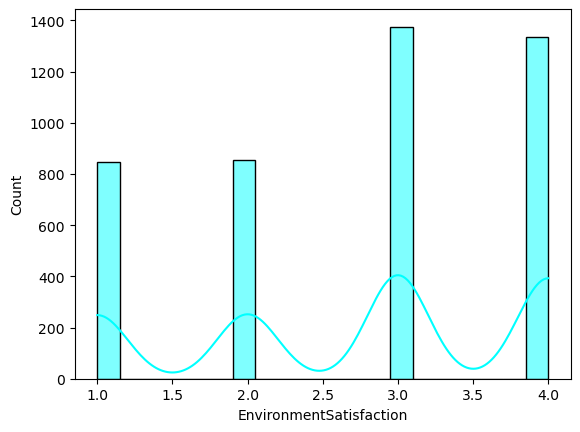

In [25]:
sns.histplot(df["EnvironmentSatisfaction"],bins=20,kde=True,color = "cyan")

<Axes: xlabel='JobSatisfaction', ylabel='Count'>

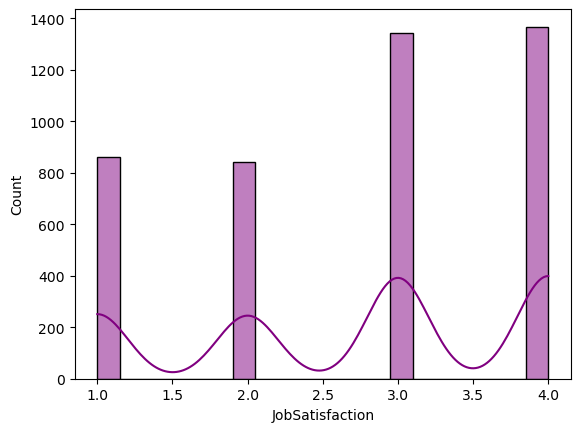

In [27]:
sns.histplot(df["JobSatisfaction"],bins=20,kde=True,color = "purple")

<Axes: xlabel='WorkLifeBalance', ylabel='Count'>

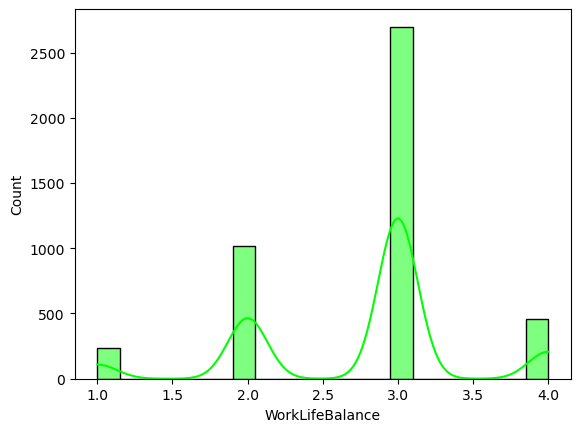

In [29]:
sns.histplot(df["WorkLifeBalance"],bins=20,kde=True,color = "lime")

In [31]:
columns = ["EnvironmentSatisfaction","JobSatisfaction","WorkLifeBalance"]
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    LOWER_BOUND = Q1-1.5*IQR
    UPPER_BOUND = Q3+1.5*IQR
    outliers = df[(df[col]<LOWER_BOUND) | (df[col]> UPPER_BOUND)]
    print(outliers.shape[0])

0
0
0


In [33]:
df.to_csv("Employee_cleaned_data.csv",index=False)